In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

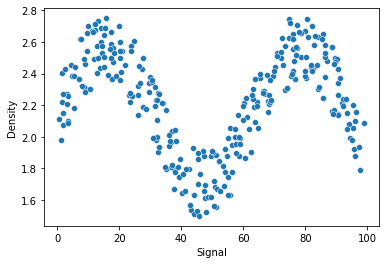

In [5]:
sns.scatterplot(x = 'Signal', y= 'Density', data = df)

In [6]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr_model = LinearRegression()

In [11]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [12]:
lr_preds = lr_model.predict(X_test)

In [13]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [16]:
 np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [17]:
signal_range = np.arange(0,100)

In [18]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [19]:
signal_pred = lr_model.predict(signal_range.reshape(-1,1))

In [20]:
# signal_pred

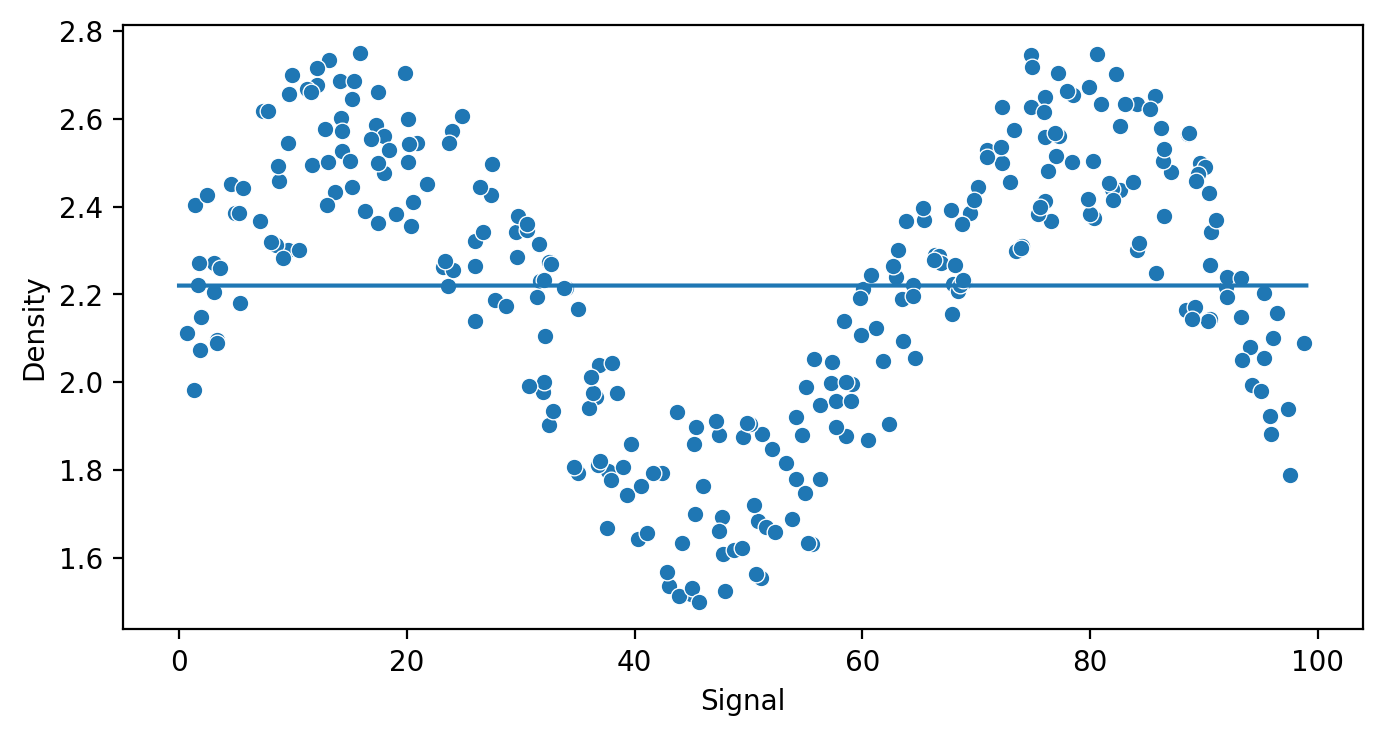

In [21]:
plt.figure(figsize = (8,4), dpi =200)
sns.scatterplot(x = 'Signal', y = 'Density', data = df)

plt.plot(signal_range, signal_pred)

# Polynomial regression 

In [43]:
def run_model(model,X_train, y_train, X_test, y_test):
    # Fit model Training
    model.fit(X_train, y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    rmse =np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE:{mae}')
    print(f'RMSE:{rmse}')
    
    
    # Plot Results Model Signal Range
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize = (8,4), dpi =200)
    sns.scatterplot(x = 'Signal', y ='Density', data = df, color = 'black')
    plt.plot(signal_range, signal_preds)

MAE:0.211198973318633
RMSE:0.2570051996584629


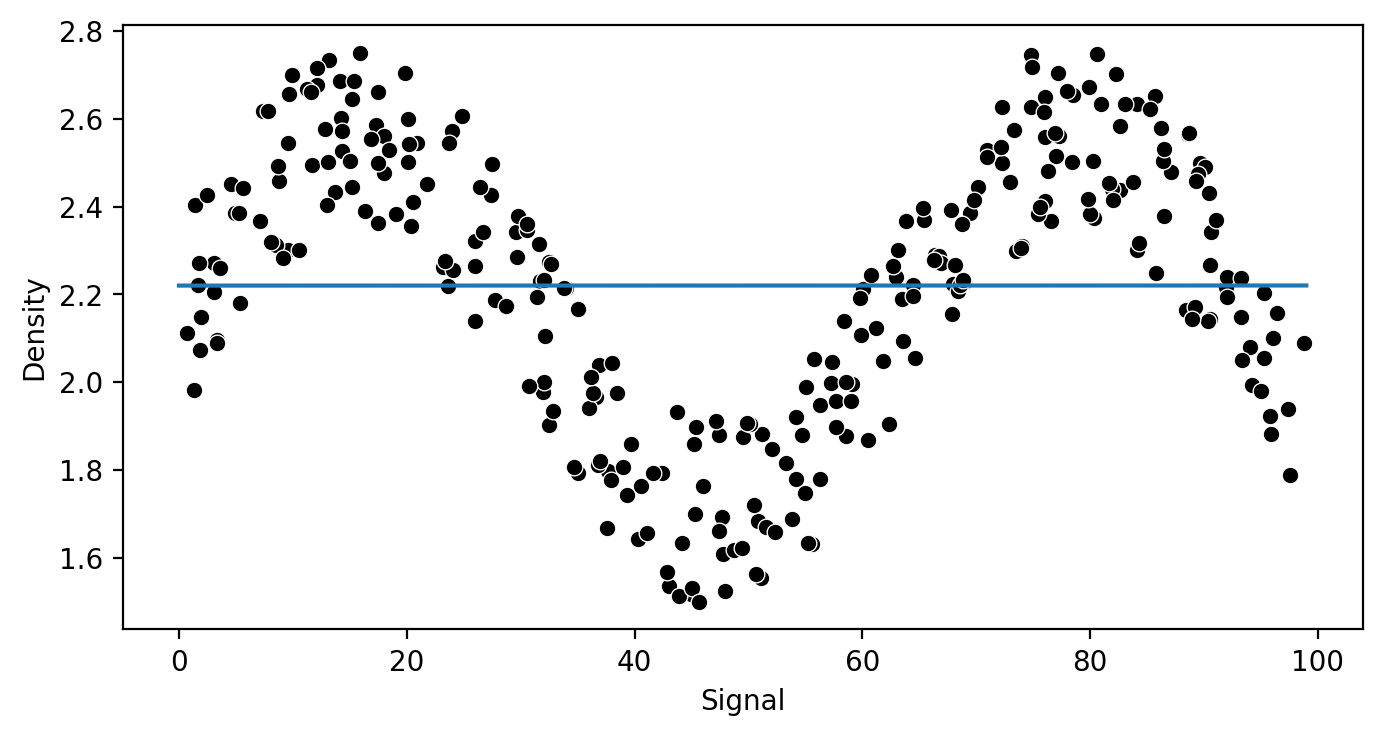

In [44]:
model=LinearRegression()
run_model(model,X_train, y_train, X_test, y_test)

In [45]:
from sklearn.pipeline import make_pipeline

from sklearn .preprocessing import PolynomialFeatures

In [46]:
pipe = make_pipeline(PolynomialFeatures(degree = 6), LinearRegression())

MAE:0.119690915641049
RMSE:0.13807393264835693


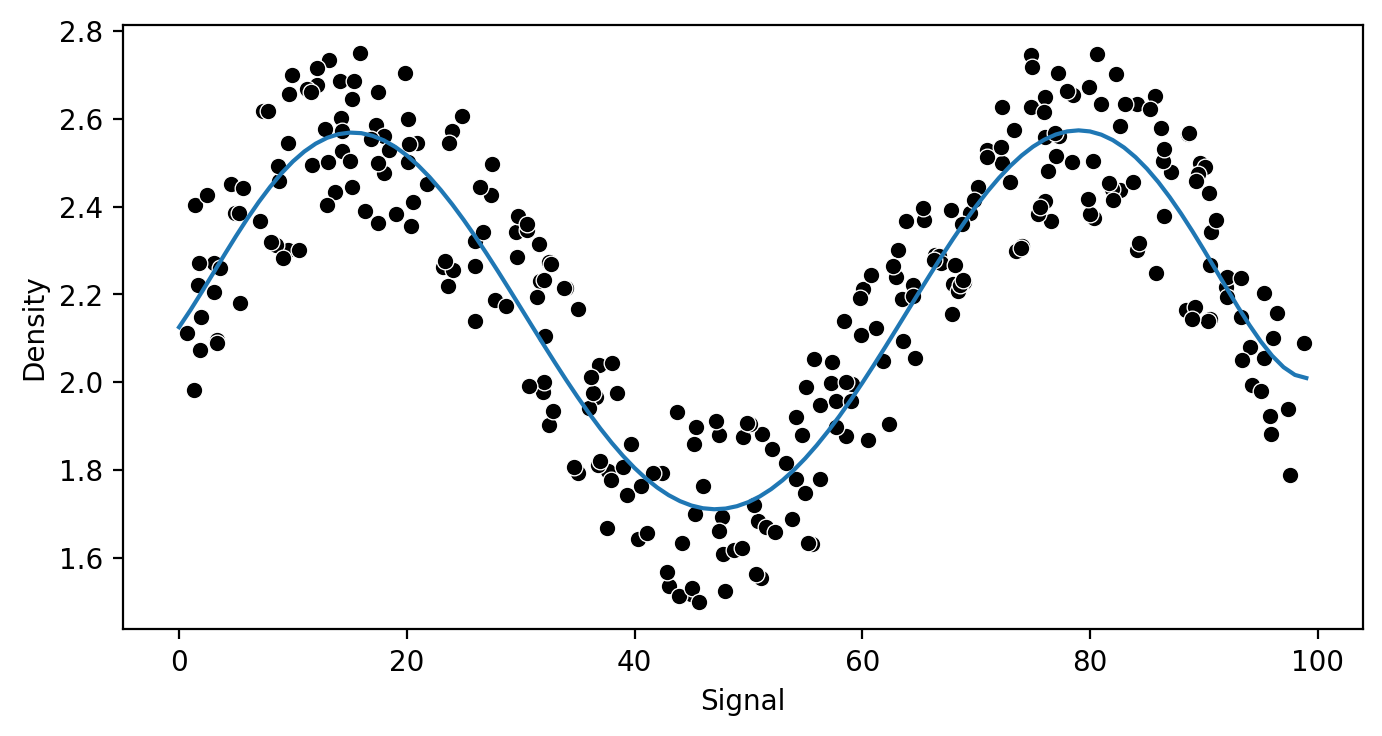

In [47]:
run_model(pipe,X_train, y_train, X_test, y_test)

In [48]:
from sklearn.neighbors import KNeighborsRegressor

MAE:0.11877297474442378
RMSE:0.1523487028635337
MAE:0.12198383614100558
RMSE:0.13730685016923647
MAE:0.11635971693292672
RMSE:0.13277855732740926


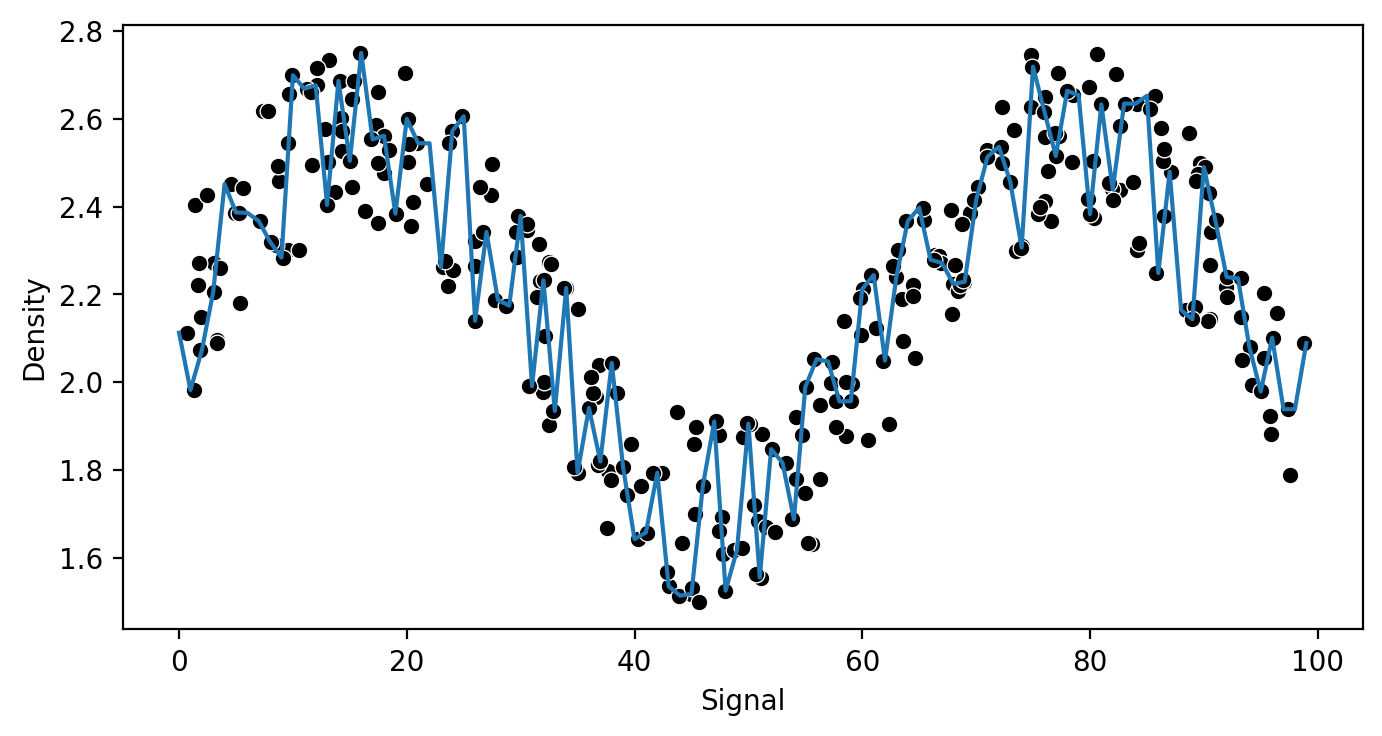

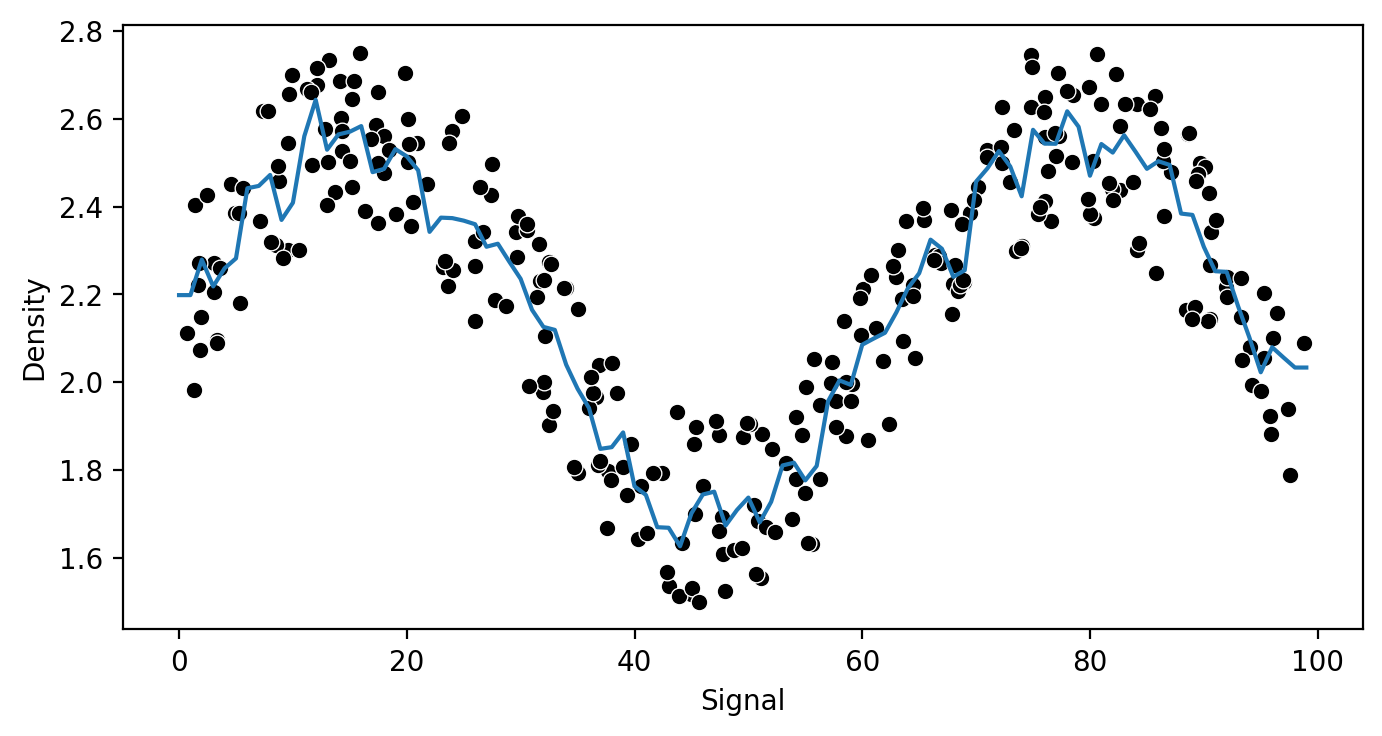

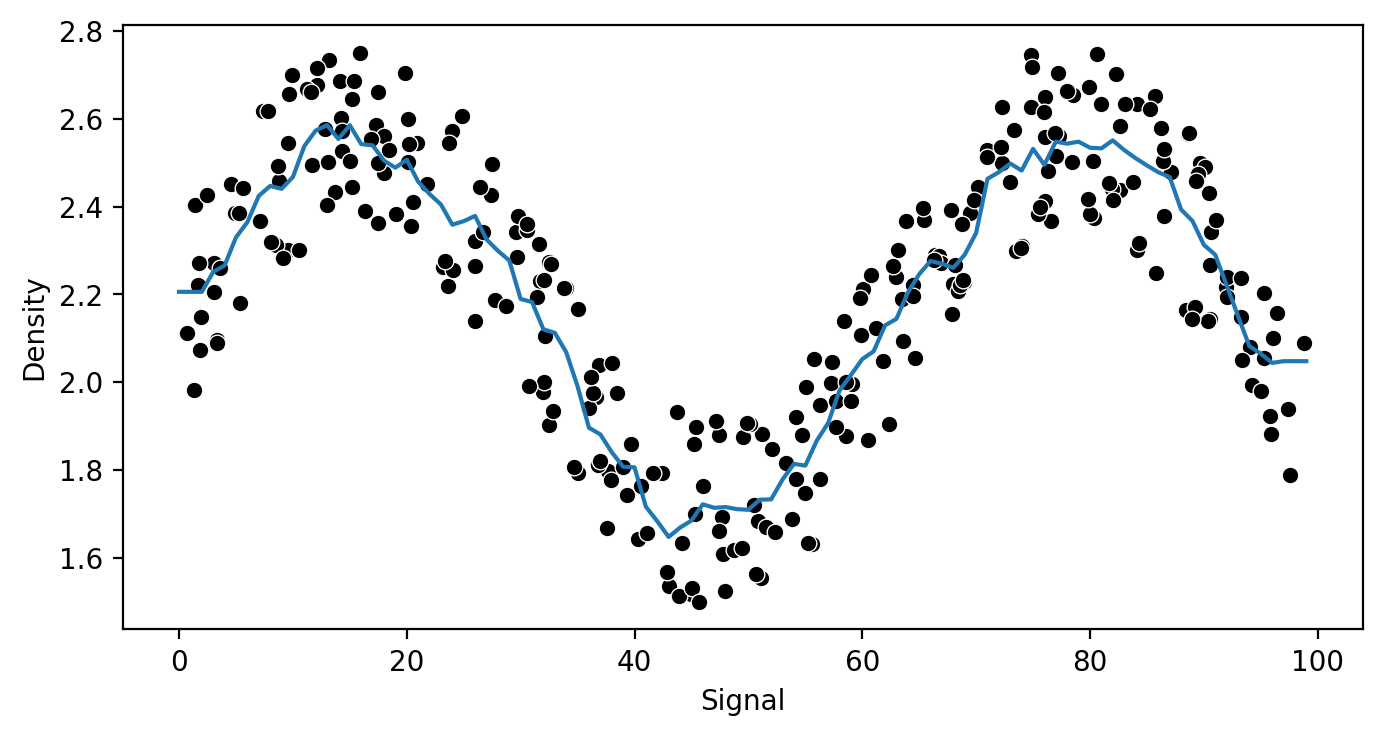

In [49]:
k_values = [1,5,10]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train, y_train, X_test, y_test)

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rfr = RandomForestRegressor(n_estimators=10)


MAE:0.10969596847527245
RMSE:0.1328930548761957


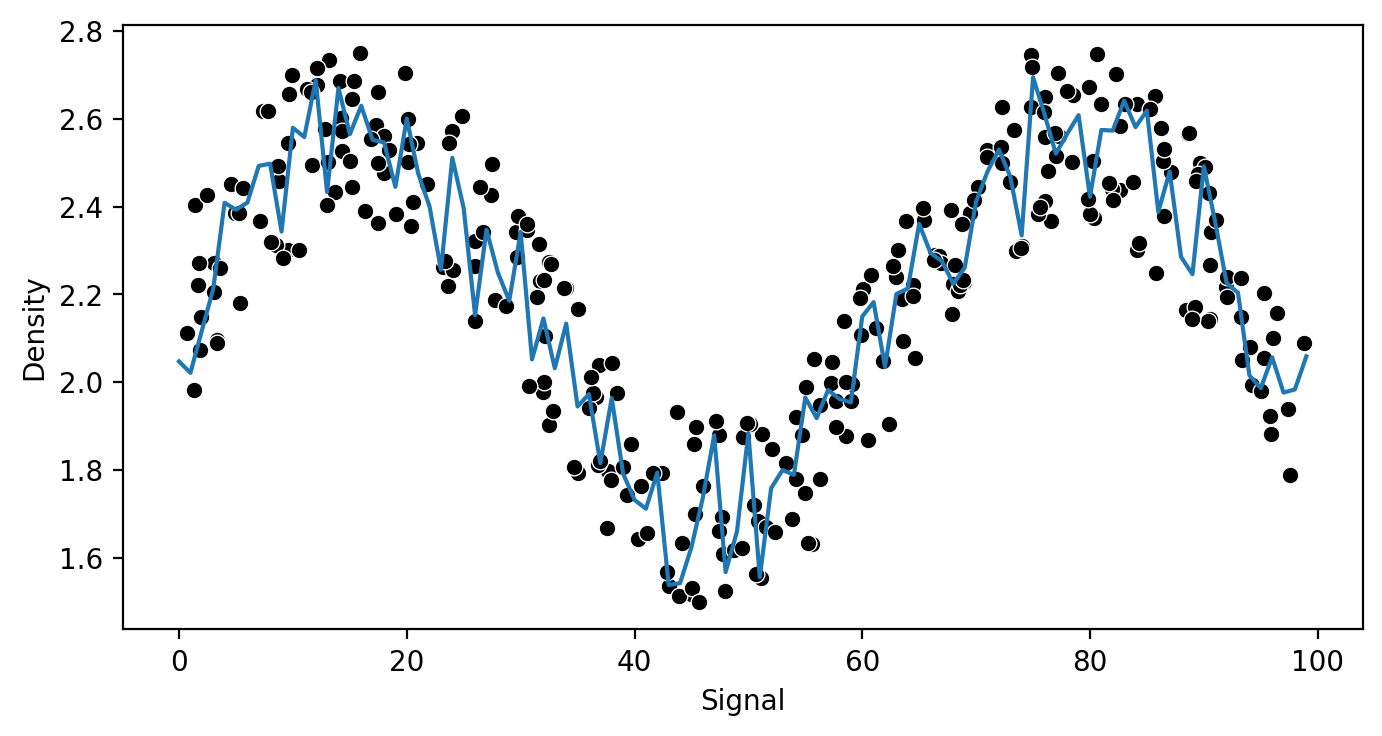

In [52]:
run_model(rfr,X_train, y_train, X_test, y_test)

In [55]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE:0.11318284854800689
RMSE:0.13294148649584667


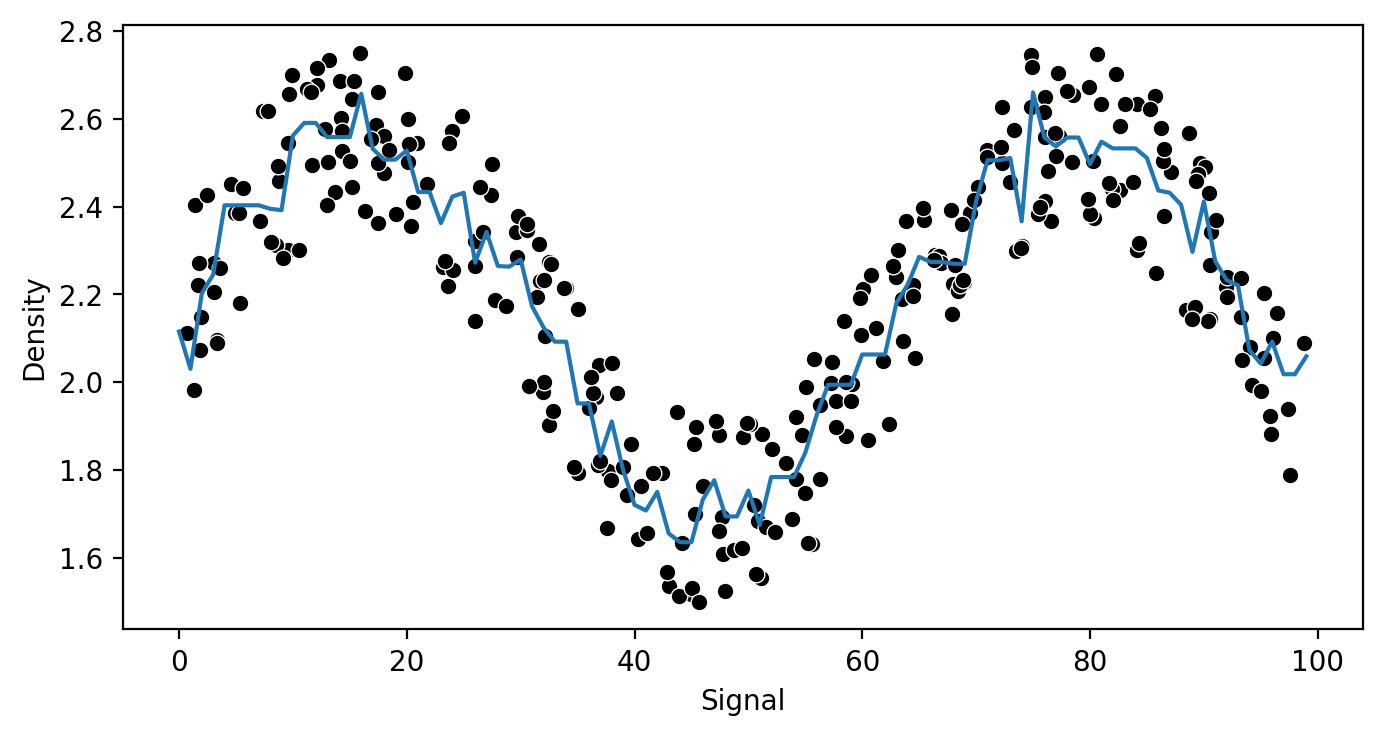

In [56]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

MAE:0.11496171887000413
RMSE:0.13570448362358162


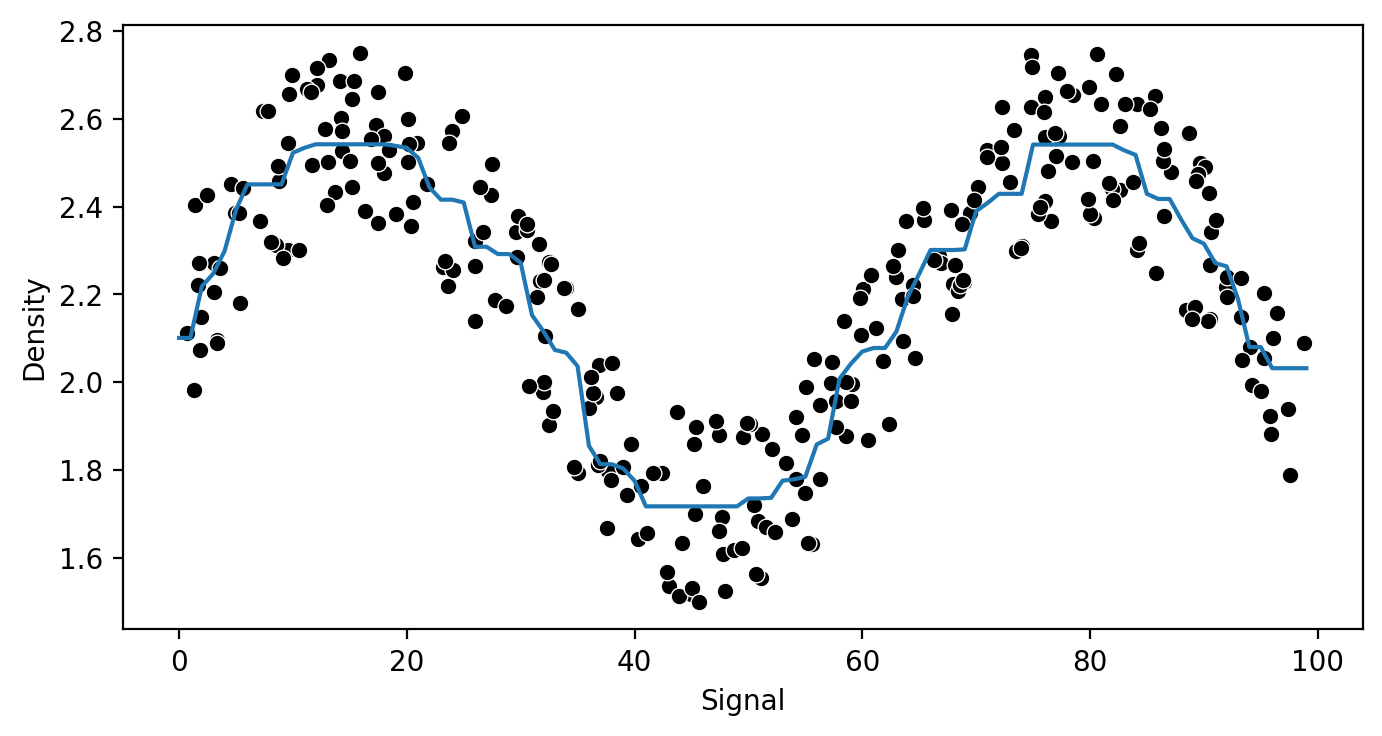

In [57]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)